In [1]:
import pandas as pd
import numpy as np

### DataPreprocess

In [2]:
ele = pd.read_csv('electric.csv')

In [3]:
ele

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW),備轉容量率(%),工業用電(百萬度),民生用電(百萬度),核一#1(萬瓩),核一#2(萬瓩),核二#1(萬瓩),...,大觀二,明潭,碧海,立霧,龍澗,卓蘭,水里,其他小水力,風力發電,太陽能發電
0,20190101,26429,23872,2557.0,10.71,279.870,192.192,0,0,98.4,...,16.0,54.0,0.0,1.2,3.0,2.2,0.0,24.3,50.9,0.0
1,20190102,30047,28148,1899.0,6.75,323.080,221.864,0,0,98.5,...,29.9,52.3,0.0,1.2,2.0,2.1,0.0,23.4,37.9,0.0
2,20190103,30343,28452,1891.0,6.65,336.597,231.146,0,0,98.7,...,14.3,65.5,0.0,1.4,1.2,2.0,0.1,24.1,41.6,0.0
3,20190104,30301,28490,1811.0,6.36,339.020,232.810,0,0,98.7,...,18.1,52.3,0.0,1.4,1.4,0.0,0.0,19.3,12.4,11.0
4,20190105,27957,26054,1903.0,7.30,315.825,216.882,0,0,98.7,...,30.4,57.6,0.0,1.3,3.0,2.9,0.0,23.9,18.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,20201027,35071,31669,3402.0,10.74,362.462,309.405,0,0,98.1,...,43.5,63.8,4.8,1.4,1.9,1.7,0.8,13.9,34.6,41.5
666,20201028,35429,31959,3470.0,10.86,365.469,311.972,0,0,98.0,...,14.4,48.0,4.0,1.2,1.4,0.0,0.5,13.7,58.8,161.6
667,20201029,34978,31271,3707.0,11.86,362.440,309.387,0,0,97.8,...,20.5,50.0,1.0,1.2,1.3,0.0,0.5,16.2,60.8,143.3
668,20201030,34479,30264,4215.0,13.93,351.492,300.041,0,0,97.8,...,12.1,32.3,2.0,1.2,1.5,0.0,0.5,16.5,60.1,207.5


### 標準化選取的數據

In [4]:
ele.columns

Index(['日期', '淨尖峰供電能力(MW)', '尖峰負載(MW)', '備轉容量(MW)', '備轉容量率(%)', '工業用電(百萬度)',
       '民生用電(百萬度)', '核一#1(萬瓩)', '核一#2(萬瓩)', '核二#1(萬瓩)', '核二#2(萬瓩)', '核三#1',
       '核三#2', '林口#1', '林口#2', '林口#3', '台中#1', '台中#2', '台中#3', '台中#4', '台中#5',
       '台中#6', '台中#7', '台中#8', '台中#9', '台中#10', '興達#1', '興達#2', '興達#3', '興達#4',
       '大林#1', '大林#2', '和平#1', '和平#2', '麥寮#1', '麥寮#2', '麥寮#3', '汽電共生',
       '大潭 (#1-#6)', '通霄 (#1-#6)', '興達 (#1-#5)', '南部 (#1-#4)', '大林(#5-#6)',
       '海湖 (#1-#2)', '國光 #1', '新桃#1', '星彰#1', '星元#1', '嘉惠#1', '豐德(#1-#2)',
       '協和 (#1-#4)', '氣渦輪', '離島', '德基', '青山', '谷關', '天輪', '馬鞍', '萬大', '大觀',
       '鉅工', '大觀二', '明潭', '碧海', '立霧', '龍澗', '卓蘭', '水里', '其他小水力', '風力發電',
       '太陽能發電'],
      dtype='object')

In [5]:
f_select = ele.drop(['工業用電(百萬度)','民生用電(百萬度)'
    ,'備轉容量率(%)', '核一#1(萬瓩)', '核一#2(萬瓩)', '核二#1(萬瓩)', '核二#2(萬瓩)', '核三#1',
       '核三#2', '林口#1', '林口#2', '林口#3', '台中#1', '台中#2', '台中#3', '台中#4', '台中#5',
       '台中#6', '台中#7', '台中#8', '台中#9', '台中#10', '興達#1', '興達#2', '興達#3', '興達#4',
       '大林#1', '大林#2', '和平#1', '和平#2', '麥寮#1', '麥寮#2', '麥寮#3', '汽電共生',
       '大潭 (#1-#6)', '通霄 (#1-#6)', '興達 (#1-#5)', '南部 (#1-#4)', '大林(#5-#6)',
       '海湖 (#1-#2)', '國光 #1', '新桃#1', '星彰#1', '星元#1', '嘉惠#1', '豐德(#1-#2)',
       '協和 (#1-#4)', '氣渦輪', '離島', '德基', '青山', '谷關', '天輪', '馬鞍', '萬大', '大觀',
       '鉅工', '大觀二', '明潭', '碧海', '立霧', '龍澗', '卓蘭', '水里', '其他小水力', '風力發電',
       '太陽能發電'], axis = 1)

In [6]:
f_select

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW)
0,20190101,26429,23872,2557.0
1,20190102,30047,28148,1899.0
2,20190103,30343,28452,1891.0
3,20190104,30301,28490,1811.0
4,20190105,27957,26054,1903.0
...,...,...,...,...
665,20201027,35071,31669,3402.0
666,20201028,35429,31959,3470.0
667,20201029,34978,31271,3707.0
668,20201030,34479,30264,4215.0


In [7]:
def standard(arr):
    import numpy as np
    sd = np.std(arr, ddof = 1)
    m = np.mean(arr)
    arr = [(a - m)/sd for a in arr]
    return arr

In [8]:
f_std = pd.DataFrame(columns = f_select.columns)
f_std['日期'] = f_select['日期']

In [9]:
for name in list(f_select.columns):
    if name != '日期':
        f_std[name] = standard(f_select[name])


In [10]:
f_std

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW)
0,20190101,-1.720283,-1.702644,-0.796070
1,20190102,-0.876192,-0.545590,-1.319945
2,20190103,-0.807135,-0.463330,-1.326314
3,20190104,-0.816933,-0.453048,-1.390007
4,20190105,-1.363796,-1.112211,-1.316760
...,...,...,...,...
665,20201027,0.295922,0.407166,-0.123312
666,20201028,0.379445,0.485638,-0.069173
667,20201029,0.274225,0.299471,0.119518
668,20201030,0.157807,0.026984,0.523969


## 送入模型

In [11]:
import sklearn 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [12]:
f_std['y'] = f_std['備轉容量(MW)'].shift(-1)
f_std.fillna(method='pad',inplace=True)

In [13]:
f_std

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW),y
0,20190101,-1.720283,-1.702644,-0.796070,-1.319945
1,20190102,-0.876192,-0.545590,-1.319945,-1.326314
2,20190103,-0.807135,-0.463330,-1.326314,-1.390007
3,20190104,-0.816933,-0.453048,-1.390007,-1.316760
4,20190105,-1.363796,-1.112211,-1.316760,-0.974410
...,...,...,...,...,...
665,20201027,0.295922,0.407166,-0.123312,-0.069173
666,20201028,0.379445,0.485638,-0.069173,0.119518
667,20201029,0.274225,0.299471,0.119518,0.523969
668,20201030,0.157807,0.026984,0.523969,0.129072


In [14]:
model = linear_model.LinearRegression() 

In [15]:
#x_list = ['淨尖峰供電能力(MW)', '尖峰負載(MW)', '備轉容量(MW)']
x_list = [ '備轉容量(MW)']

In [16]:
x = f_std[x_list].values
y = f_std['y'].values

In [17]:
f_std['y2']= cross_val_predict(model,x, y, cv=50)

In [18]:
f_std

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW),y,y2
0,20190101,-1.720283,-1.702644,-0.796070,-1.319945,-0.692194
1,20190102,-0.876192,-0.545590,-1.319945,-1.326314,-1.151325
2,20190103,-0.807135,-0.463330,-1.326314,-1.390007,-1.156907
3,20190104,-0.816933,-0.453048,-1.390007,-1.316760,-1.212728
4,20190105,-1.363796,-1.112211,-1.316760,-0.974410,-1.148534
...,...,...,...,...,...,...
665,20201027,0.295922,0.407166,-0.123312,-0.069173,-0.106997
666,20201028,0.379445,0.485638,-0.069173,0.119518,-0.059242
667,20201029,0.274225,0.299471,0.119518,0.523969,0.107202
668,20201030,0.157807,0.026984,0.523969,0.129072,0.463966


In [19]:
y2  = f_std['y2']

In [20]:
err = metrics.mean_squared_error(y, y2)
err


0.22617622668409892

In [21]:
np.sqrt(err)

0.47557988465041173

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
t_color = 'cornflowerblue'
v_color = 'orange'

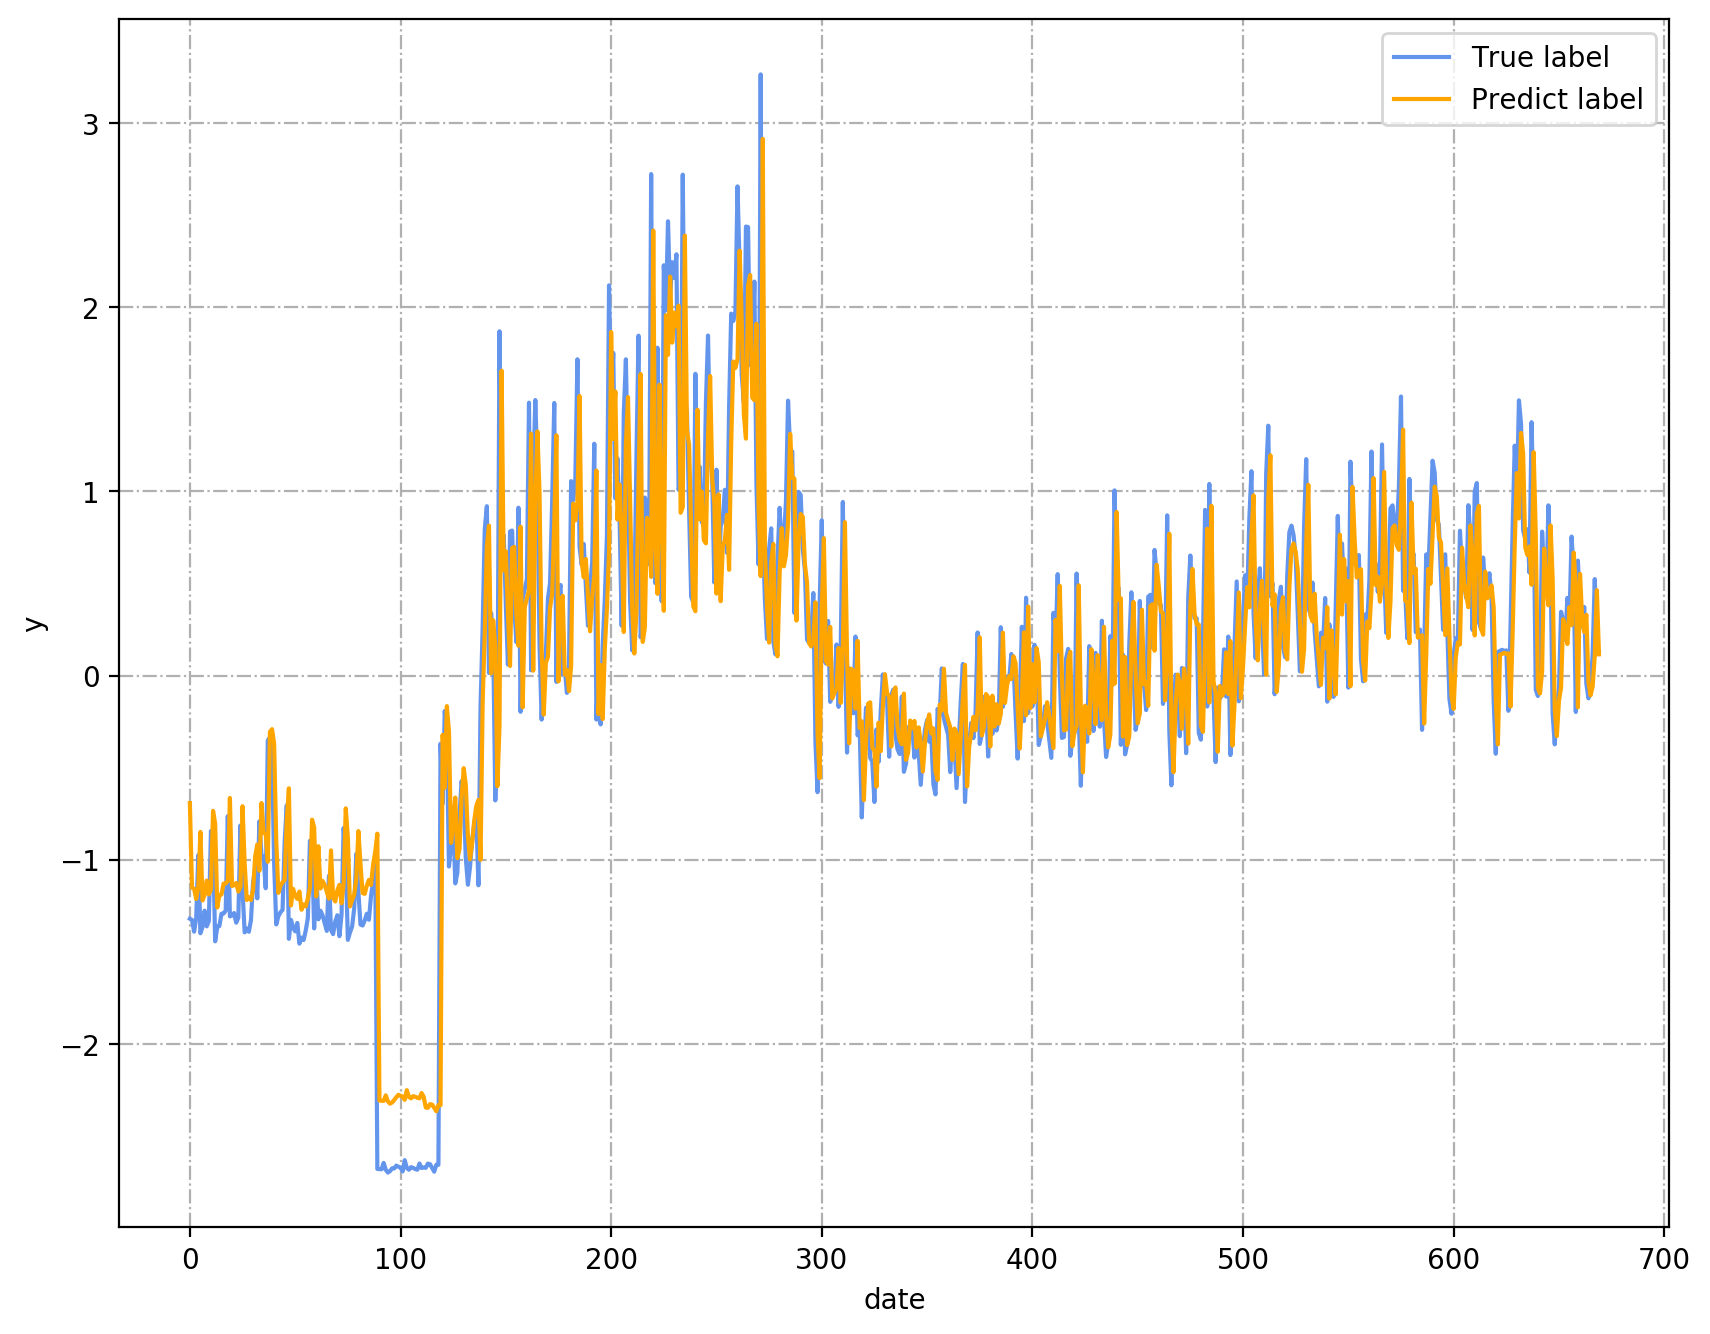

In [23]:
plt.figure(figsize = (10, 8), dpi = 200) 
plt.grid(linestyle='-.')
#plt.ylim(0, 1)
#plt.xlim(0, 100)
plt.xlabel('date')
plt.ylabel('y')
# plt.plot(y, label = 'True label', linestyle = '--', color = t_color)
# plt.plot(y2, label = 'Predict label', linestyle = '--', color = v_color)

T_aver, = plt.plot(y, label = 'True label', color = t_color)
V_aver, = plt.plot(y2, label = 'Predict label', color = v_color)

plt.legend(handles = [T_aver, V_aver,], loc = 'best')